In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv("Tesla.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Adj Close'}>]], dtype=object)

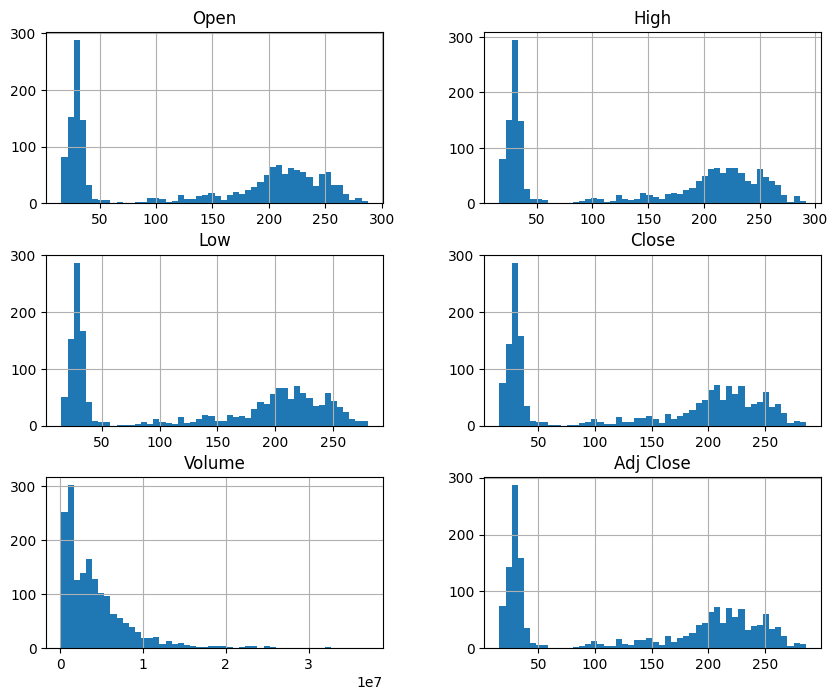

In [6]:
df.hist(bins=50, figsize=(10,8))

In [7]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Open"].sort_values(ascending=False)

Open         1.000000
High         0.999623
Low          0.999605
Close        0.999233
Adj Close    0.999233
Volume       0.407515
Name: Open, dtype: float64

In [8]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [9]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
l_reg = LinearRegression()
l_reg.fit(X_trian, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = l_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Square Error:" , rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.999785024328411
Mean Squared Error: 2.0048386486680947
Root Mean Square Error: 1.4159232495683143
Mean Absolute Error: 0.9281562554187115


In [12]:
l_reg.intercept_, l_reg.coef_

(0.029199030818773508,
 array([-5.11507946e-01,  8.18254011e-01,  6.92548399e-01, -3.72770377e-08]))

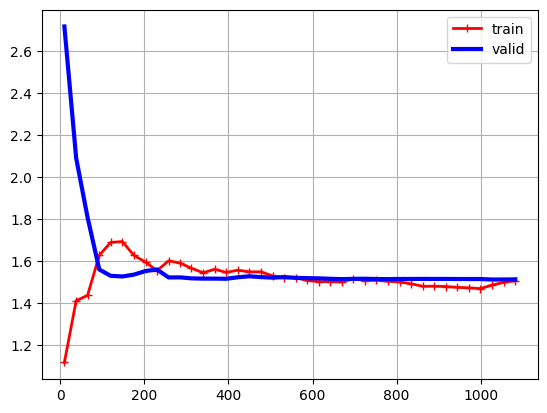

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_trian, y_train, train_sizes=np.linspace(0.01,1.0,40), cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = "valid")
plt.axis()
plt.grid()
plt.legend()
plt.show()

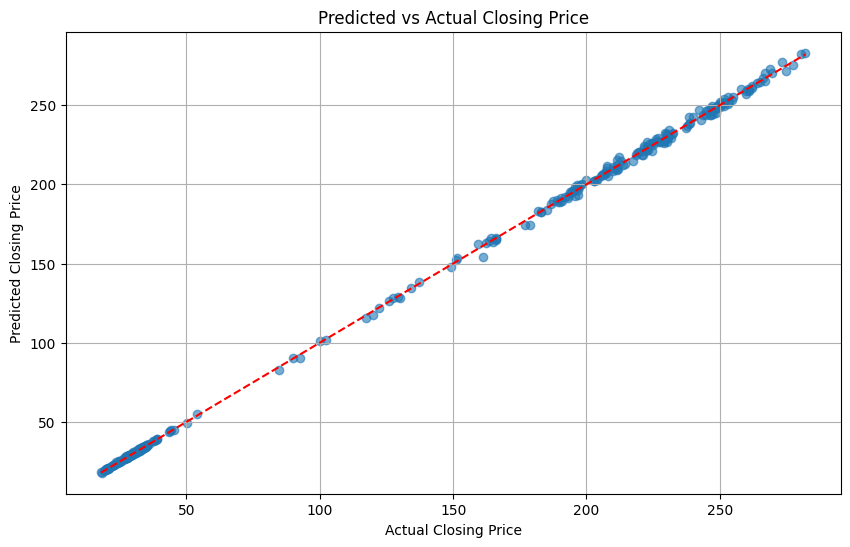

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Predicted vs Actual Closing Price")
plt.grid()
plt.show()
